# Proyecto I Bimestre

## Homicidios y asesinatos - Ministerio del Interior

*Contiene información referente a los levantamientos de cadaver que han sido determinados como homicidios y asesinatos.*

### Objetivos
+ Realizar el análisis de el dataset de homicidios y asesinatos.
+ Graficar los resultados obtenidos.

### Desarrollo

#### Fuente
Oficina de Análisis de Información del delito del Ministerio del Interior

Se puede obtener en el siguiente enlace: http://catalogo.datosabiertos.gob.ec/en/dataset/homicidios-y-asesinatos


#### Análisis
+ Se inicia importando las librerias que se muestran a continuacion:

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

+ Utilizamos pd.read_csv para leer los datos.

In [3]:
path = "C://Users//yadir//Documents//GitHub//py-quinchiguango-zumba-yadira-liliana//Proyecto//dataset.csv"
df= pd.read_csv(path, encoding = 'unicode_escape',sep = ";")

##### Por tipo de muerte
+ Visualizamos el grafico de el numero de muertes por el tipo de estas. La cantidad de Asesinatos es mucho mayor a las demas, incluso que los homicidios.

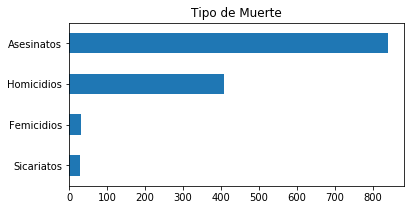

In [85]:
plt.figure(figsize=(6,3))
plt.title('Tipo de Muerte')
df.TipoMuerte.value_counts().sort_values().plot(kind='barh')
plt.show()

##### Tipo de Muerte por Genero
+ Revisamos la información cruzada del tipo de muerte por genero.

In [37]:
pd.crosstab(df.TipoMuerte, df.Genero)

Genero,FEMENINO,MASCULINO
TipoMuerte,,
Asesinatos,88,752
Femicidios,32,0
Homicidios,65,342
Sicariatos,1,29


Podemos graficar los homicidios por genero, observamos que existe un numero mucho mayor de homicidios hacia en genero masculino.

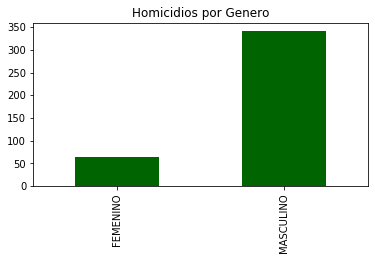

In [95]:
plt.figure(figsize=(6,3))
plt.title('Homicidios por Genero')
df.Genero[df.TipoMuerte=="Homicidios"].value_counts().sort_values().plot(kind='bar', color = 'DarkGreen')
plt.show()

De la misma manera graficamos los asesinatos por genero, notamos que tambien existe un numero mucho mayor de asesinatos hacia en genero masculino.

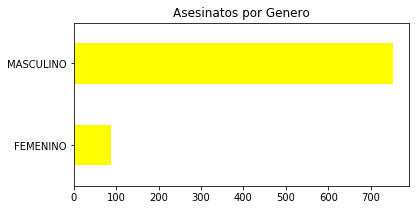

In [96]:
plt.figure(figsize=(6,3))
plt.title('Asesinatos por Genero')
df.Genero[df.TipoMuerte=="Asesinatos"].value_counts().sort_values().plot(kind='barh', color = 'Yellow')
plt.show()

##### Por provincias
+ Las cinco provincias con mayor numero de muertes.

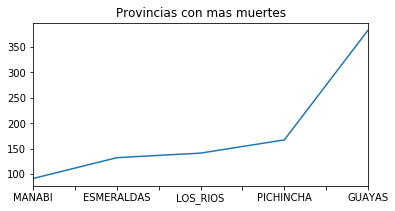

In [86]:
plt.figure(figsize=(6,3))
plt.title('Provincias con mas muertes')
df.Provincia.value_counts()[:5].sort_values().plot(kind='line')
plt.show()

+ De la misma manera podemos encontrar las ciudades con mayor numero de muertes.

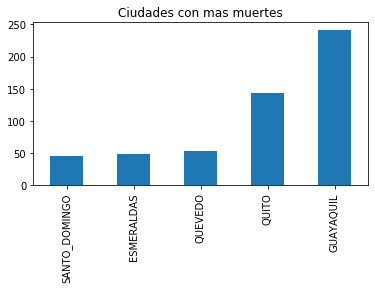

In [90]:
plt.figure(figsize=(6,3))
plt.title('Ciudades con mas muertes')
df.Canton.value_counts()[:5].sort_values().plot(kind='bar')
plt.show()

##### Por estado civil
+ En numero de muertos segun el estado civil y el genero.

In [29]:
pd.crosstab(df.Genero, df.EstadoCivil)

EstadoCivil,CASADO,DIVORCIADO,NO DETERMINADO,SOLTERO,UNION LIBRE,VIUDO
Genero,,,,,,
FEMENINO,37,9,2,126,5,7
MASCULINO,190,33,29,812,48,11


+ Se toma los Femicidios como tipo de muerte y cruzamos esta informacion con el estado civil de las victimas.

In [33]:
pd.crosstab(df.TipoMuerte.where(df.TipoMuerte=="Femicidios"), df.EstadoCivil)

EstadoCivil,CASADO,NO DETERMINADO,SOLTERO,VIUDO
TipoMuerte,,,,
Femicidios,9,1,21,1


##### Por edad
+ Analizamos por rangos de edades, se obtiene que el 57.5% de las victimas estan entre 20 y 40 años.

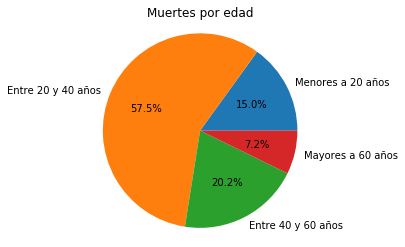

In [65]:
edad = df['Edad'].dropna()
rango_edades = [int(e) for e in edad]
menores20 = 0 
menores40 = 0 
menores60 = 0
mayores60 = 0
for i in rango_edades:
    if(i <= 20):
        menores20 = menores20 + 1
    elif(i <= 40 and i > 20):
        menores40 = menores40 + 1
    elif(i <= 60 and i > 40):
        menores60 = menores60 + 1
    else:
        mayores60 = mayores60 + 1

edades = [menores20, menores40, menores60, mayores60]
edades_etiqueta = ['Menores a 20 años', 'Entre 20 y 40 años', 'Entre 40 y 60 años', 'Mayores a 60 años']
                   
plt.title("Muertes por edad")
plt.pie(edades, labels=edades_etiqueta, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

+ Ahora se analiza por edades pero para Asesinatos.

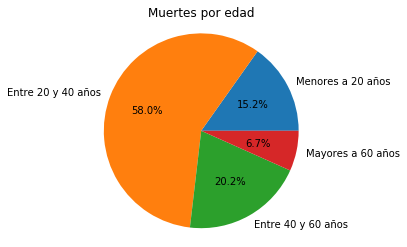

In [68]:
edad = df.Edad[df.TipoMuerte=="Asesinatos"].dropna()
rango_edades = [int(e) for e in edad]
menores20 = 0 
menores40 = 0 
menores60 = 0
mayores60 = 0

for i in rango_edades:
    if(i <= 20):
        menores20 = menores20 + 1
    elif(i <= 40 and i > 20):
        menores40 = menores40 + 1
    elif(i <= 60 and i > 40):
        menores60 = menores60 + 1
    else:
        mayores60 = mayores60 + 1

edades = [menores20, menores40, menores60, mayores60]
edades_etiqueta = ['Menores a 20 años', 'Entre 20 y 40 años', 'Entre 40 y 60 años', 'Mayores a 60 años']
                   
plt.title("Muertes por edad")
plt.pie(edades, labels=edades_etiqueta, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

+ Por edades en la provincia de Pichincha

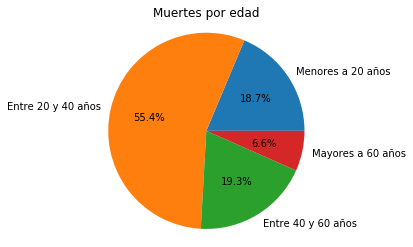

In [69]:
edad = df.Edad[df.Provincia=="PICHINCHA"].dropna()
rango_edades = [int(e) for e in edad]
menores20 = 0 
menores40 = 0 
menores60 = 0
mayores60 = 0

for i in rango_edades:
    if(i <= 20):
        menores20 = menores20 + 1
    elif(i <= 40 and i > 20):
        menores40 = menores40 + 1
    elif(i <= 60 and i > 40):
        menores60 = menores60 + 1
    else:
        mayores60 = mayores60 + 1

edades = [menores20, menores40, menores60, mayores60]
edades_etiqueta = ['Menores a 20 años', 'Entre 20 y 40 años', 'Entre 40 y 60 años', 'Mayores a 60 años']
                   
plt.title("Muertes por edad")
plt.pie(edades, labels=edades_etiqueta, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### Conclusión
El análisis del dataset de homicidios y asesinatos, asi como la graficación de resultados se lo realizó rapidamente gracias a las librerias de pandas que nos brindan la facilidad de realizar calculos matematicos con pocas lineas de codigo y se una manera sencilla.